# Data & Things

## Lecture: IoT and Data

# Monitoring IoT Sensor Data
## Data Publisher Simulation

This part of code simulates an IoT data publisher, which continuously sends data readings to the broker.

If your environment doesn't have the package **paho-mqtt**, remember to install it before using it.

* To install the package: **pip install paho-mqtt**

* Details of the package: https://pypi.org/project/paho-mqtt/

In [ ]:
!pip install paho-mqtt==1.6.0


## 1. What is MQTT?

MQTT (Message Queuing Telemetry Transport) is a standard messaging protocol for the Internet of Things. Before sending or receiving a message, each client must first connect to a broker (server). Client is any device that connects to an MQTT broker over a network. Broker acts as a post office; responsible for receiving all messages and sending these messages to related subscribers.

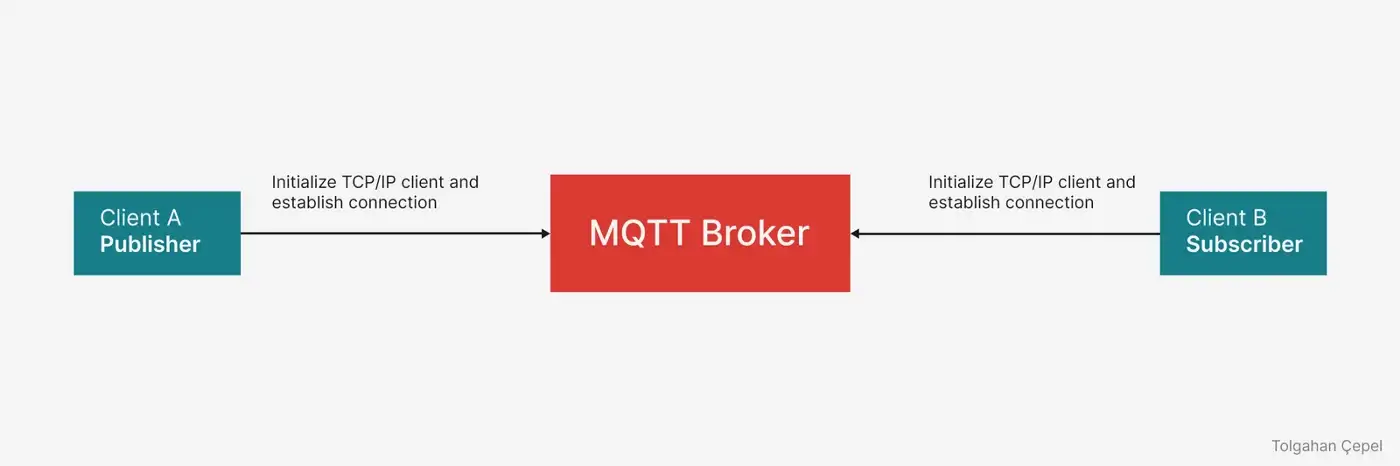

**mqtt.eclipseprojects.io**

This is a public test MQTT broker service. It currently listens on the following ports:

* 1883 : MQTT over unencrypted TCP
* 8883 : MQTT over encrypted TCP
* 80 : MQTT over unencrypted WebSockets (note: URL must be /mqtt )
* 443 : MQTT over encrypted WebSockets (note: URL must be /mqtt )

## 2. Publising an MQTT Message in Python

Let’s start by importing modules. The **time** module will be used to publish messages every 2 seconds. The **mqtt** module is the official implementation of Paho by Eclipse Foundation; will be used for connecting to broker and publish messages.

In [ ]:
import time
import paho.mqtt.client as mqtt

# We create a client as the data publisher
mqttc = mqtt.Client()
# We are connecting to port 1883 and set *keepalive* parameter to 60; *keepalive* is the maximum waiting time in seconds.
mqttc.connect("mqtt.eclipseprojects.io", 1883, 60)

# We send the following readings repeatedly. Once we reach the end, we start from the beginning again.
data = [-10, -8, -7, -5, -2, 0, 1, 3, 5, 6, 7, 13, 15, 17, 20, 22, 25]
period = len(data)

if __name__ == "__main__":
    print("Publishing...")
    
    index = 0
    while (index >= 0):
        # Get the current data reading to send out
        temperature = data[index % period]
        
        # Publish the data reading as 'myroom/temperature'
        #Publisher is open to all! Make sure use your own ‘Data name’ in your exercise of Publisher/Subscriber
        mqttc.publish("myroom/temperature", str(temperature))
        
        # We send the next reading after 2 seconds
        time.sleep(2)
        index = index + 1

The publisher will then keep sending data out until we stop it here explicitly. There can be many subscribers that connect to the brokder to receive the data.

#### Reference

* https://medium.com/@tolgahan.cepel/monitoring-iot-sensor-data-with-plotly-dash-6c50761c0840